In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Resume.csv")

In [6]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [8]:
len(df["Category"].unique())

24

In [9]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [11]:
df=df.drop(columns=["ID","Resume_html"])

In [12]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

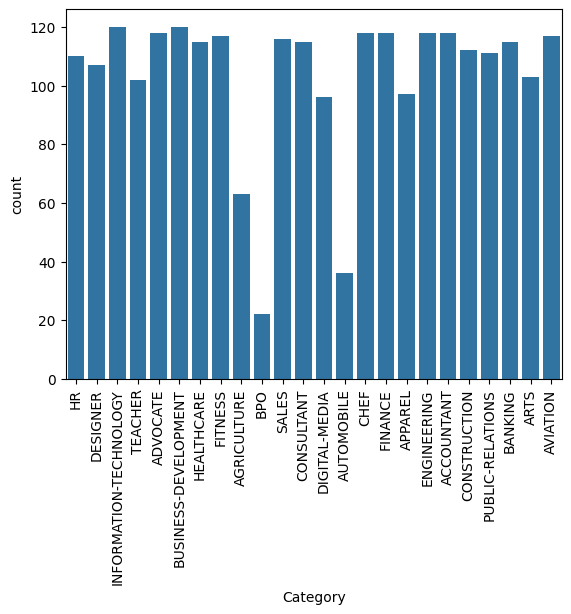

In [14]:
sns.countplot(df,x="Category")
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.show()

In [15]:
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [16]:
import re

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from textblob import TextBlob

In [20]:
from nltk.corpus import stopwords

In [21]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [24]:
def preprocess_text(text):
    text=text.lower()
    
    pattern=re.compile('<.*?>')
    text=pattern.sub(r'',text)
    
    pattern=re.compile(r'https?://\S+|www\.\S+')
    text= pattern.sub(r'',text)
    
    text=text.translate(str.maketrans('','',string.punctuation))
    
    #txtblob=TextBlob(text)
    #text=txtblob.correct().string
    
    new_text=[]
    for words in text.split():
        if words in stopwords.words("english"):
            new_text.append('')
        else:
            new_text.append(words)
    text=" ".join(new_text)
    
    text=" ".join(ps.stem(word)for word in text.split())
    
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [25]:
preprocess_text("I am the criketer")

'criket'

In [26]:
df["Resume_str"]=df["Resume_str"].apply(preprocess_text)

In [28]:
df["Resume_str"]

0       hr administratormarket associ hr administr sum...
1       hr specialist us hr oper summari versatil medi...
2       hr director summari 20 year experi recruit 15 ...
3       hr specialist summari dedic driven dynam 20 ye...
4       hr manag skill highlight hr skill hr depart st...
                              ...                        
2479    rank sgte5 non commiss offic charg brigad mail...
2480    govern relat commun organiz develop director p...
2481    geek squad agent profession profil support spe...
2482    program director offic manag summari highli pe...
2483    storekeep ii profession summari purpos documen...
Name: Resume_str, Length: 2484, dtype: object

In [29]:
df["Resume_str"][6]

'hr manag summari human resourc manag extens background administr duti includ experi implement staff develop train mediat conflict resolut benefit compens train hr record manag hr polici develop legal complianc demonstr success develop teambuild program write personnel manual coordin special program job descript onlin state mandat train highlight univers eventsspeci program prepar agenda fmlaadaeeowc mediat advocaci hri technolog tesol teacher univers staff employe relat web design use reddot sharepoint hr programproject manag microsoft offic suit orient onboard train develop perform manag organiz develop hr polici procedur publisherindesignquark accomplish enjoy 5k runswalk note profession develop complet ongo train area compens benefit employe labor relat leav absenc custom servic supervisori train workplac safetysecur creat public advertis twu thehra confer invit guest speaker staff develop day twu houston campu sever affili confer develop onlin state mandat train twu employe experi

In [30]:
df.head()

,Resume_str,Category
0,hr administratormarket associ hr administr sum...,HR
1,hr specialist us hr oper summari versatil medi...,HR
2,hr director summari 20 year experi recruit 15 ...,HR
3,hr specialist summari dedic driven dynam 20 ye...,HR
4,hr manag skill highlight hr skill hr depart st...,HR


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2880 entries, 102 to 2475
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2880 non-null   object
 1   Category    2880 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 56.2+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder=LabelEncoder()
df["Category"]=labelencoder.fit_transform(df["Category"])

In [323]:
df.head()

,Resume_str,Category
102,hr personnel assist summari us citizen author ...,19
51,hr assist summari hard worker dedic detail ori...,19
92,global hr manag summari global hr profession 1...,19
14,hr coordin summari applic screen background ch...,19
106,design hr assist profession summari human reso...,19


In [80]:
from sklearn.utils import resample

max_count = df['Category'].value_counts().max()


balanced_data = []

for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

df = pd.concat(balanced_data)

In [82]:
df["Category"].value_counts()

Category
19    120
13    120
4     120
7     120
21    120
11    120
0     120
15    120
3     120
16    120
10    120
5     120
14    120
12    120
22    120
8     120
2     120
17    120
18    120
9     120
1     120
23    120
20    120
6     120
Name: count, dtype: int64

In [312]:
df[df["Category"]==5]["Resume_str"].iloc[4]

'data analyst profession summari industri system engin graduat certifi base sa programm lean six sigma green belt strong background statist mathemat logic problem solv look dynam opportun data driven field analyt statist model core qualif data scienc tool r base sa python numpi panda matplotlib scikit learn spss minitab matlab apach spark sql ms excel ms visio tableau mysql oracl databas microsoft access key compet data extract data wrangl data analysi data visual regress analysi linear logist multinomi time seri analysi associ rule mine mont carlo simul optim random forest experi 072016 current data analyst compani name － state 092015 052016 student manag compani name － state undertook leadership advisori role train newcom hone culinari behavior skill project classif custom credit card compani jan 2016 \xad may 2016 perform logist regress credit card compani dataset classifi client credibl noncred extract crucial factor simplifi classif model use exploratori factor analysi develop val

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
tfidf=TfidfVectorizer()

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(df["Resume_str"],df["Category"],test_size=0.2)

In [88]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2304,), (576,), (2304,), (576,))

In [89]:
tfidf_X_train=tfidf.fit_transform(X_train).toarray()
tfidf_X_test=tfidf.transform(X_test).toarray()

In [90]:
len(tfidf_X_train[0]),len(tfidf_X_test[0])

(30548, 30548)

In [91]:
tfidf_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
y_test

1163    12
1355     5
50      19
519      1
2020    11
        ..
598      9
1898     0
1997    11
1600     3
1868     0
Name: Category, Length: 576, dtype: int32

In [93]:
tfidf.get_feature_names_out()


array(['00', '000', '001', ..., 'µpg', 'école', 'òwaterfalló'],
      dtype=object)

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [95]:
rf.fit(tfidf_X_train,y_train)

RandomForestClassifier()

In [96]:
y_pred=rf.predict(tfidf_X_test)

In [97]:
y_pred.shape

(576,)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8541666666666666

In [99]:
from sklearn.svm import SVC

In [100]:
svm=SVC(kernel="linear")

In [101]:
svm.fit(tfidf_X_train,y_train)

SVC(kernel='linear')

In [102]:
y_pred=svm.predict(tfidf_X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.8350694444444444

In [313]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [314]:
text=preprocess_text(myresume)
[text]

['data scientist special machin learn deep learn comput vision strong background mathemat statist program passion uncov hidden pattern insight data extens experi develop predict model implement deep learn algorithm design comput vision system technic skill includ profici python sklearn tensorflow pytorch set apart abil effect commun complex concept divers audienc excel translat technic insight action recommend drive inform decisionmak your look dedic versatil data scientist collabor impact project eager contribut expertis let har power data togeth unlock new possibl shape better futur contact sourc email 611noorsaeedgmailcom phone 03442826192 github linkdin blog youtub artifici intellig work experi skill noor saeed languag english urdu hindi versatil data scientist expertis wide rang project includ machin learn recommend system deep learn comput vision throughout career success develop deploy variou machin learn model solv complex problem drive datadriven decisionmak machin learnin dee

In [106]:
print(hasattr(tfidf, 'vocabulary_'))


True


In [315]:
test=tfidf.transform([text])

In [316]:
test=test.toarray()

In [135]:
test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [317]:
rf.predict(test)

array([9])

In [320]:
x=svm.predict(test)

In [322]:
svm.predict(test)

array([2])

In [321]:
labelencoder.inverse_transform(x)[0]

'AGRICULTURE'

In [319]:
classes = labelencoder.classes_
label_mapping = {label: index for index, label in enumerate(classes)}
print(label_mapping)

{'ACCOUNTANT': 0, 'ADVOCATE': 1, 'AGRICULTURE': 2, 'APPAREL': 3, 'ARTS': 4, 'AUTOMOBILE': 5, 'AVIATION': 6, 'BANKING': 7, 'BPO': 8, 'BUSINESS-DEVELOPMENT': 9, 'CHEF': 10, 'CONSTRUCTION': 11, 'CONSULTANT': 12, 'DESIGNER': 13, 'DIGITAL-MEDIA': 14, 'ENGINEERING': 15, 'FINANCE': 16, 'FITNESS': 17, 'HEALTHCARE': 18, 'HR': 19, 'INFORMATION-TECHNOLOGY': 20, 'PUBLIC-RELATIONS': 21, 'SALES': 22, 'TEACHER': 23}


In [114]:
import PyPDF2

In [190]:
import numpy as np

In [202]:
def pdf_to_text(filepath):
    with open(filepath,"rb") as file:
        reader=PyPDF2.PdfReader(file)
        text=""
        for page in range(len(reader.pages)):
            text+=reader.pages[page].extract_text()
    return text        
        

In [377]:
def predict_role(filepath):
     text=pdf_to_text(filepath)
     text=preprocess_text(text)
     text=[text]
     text=tfidf.transform(text)
     probabilities=rf.predict_proba(text)[0]
     top_3_roles=np.argsort(probabilities)
     top_3_roles=top_3_roles[-3:]
     top_3_roles=np.reshape(top_3_roles,(3,1))
     roles=[]
     for i in top_3_roles:    
        roles.append(labelencoder.inverse_transform(i))
     roles=np.flip(roles)
     return roles,probabilities

In [379]:
predict_role(r"C:\Users\hp\Desktop\pdf_paths\W292.pdf")

(array([['HR'],
        ['ACCOUNTANT'],
        ['AVIATION']], dtype=object),
 array([0.07, 0.03, 0.04, 0.  , 0.05, 0.05, 0.07, 0.  , 0.04, 0.06, 0.01,
        0.03, 0.03, 0.03, 0.06, 0.05, 0.03, 0.04, 0.02, 0.16, 0.04, 0.05,
        0.03, 0.01]))

In [355]:
def test(filepath):
    text=pdf_to_text(filepath)
    text = preprocess_text(text)
    test = tfidf.transform([text])
    x = rf.predict_proba(test).flatten() 
    top_3_roles=np.argsort(x)
    top_3_roles=top_3_roles[-3:]
    top_3_roles=np.reshape(top_3_roles,(3,1))
    roles=[]
    for i in top_3_roles:
        roles.append(labelencoder.inverse_transform(i))
    roles=np.flip(roles)
    return roles,x
  

In [366]:
text=tfidf.transform([text])

In [368]:
x=rf.predict_proba(text)[0]
x

array([0.01, 0.02, 0.05, 0.04, 0.03, 0.03, 0.04, 0.02, 0.02, 0.18, 0.01,
       0.01, 0.03, 0.08, 0.04, 0.11, 0.06, 0.04, 0.05, 0.01, 0.08, 0.02,
       0.01, 0.01])

In [370]:
x = rf.predict_proba(text).flatten()
x

array([0.01, 0.02, 0.05, 0.04, 0.03, 0.03, 0.04, 0.02, 0.02, 0.18, 0.01,
       0.01, 0.03, 0.08, 0.04, 0.11, 0.06, 0.04, 0.05, 0.01, 0.08, 0.02,
       0.01, 0.01])

In [358]:
test(r"c:\Users\hp\Desktop\pdf_paths\finance-sample-resume.pdf")

(array([['BANKING'],
        ['PUBLIC-RELATIONS'],
        ['AGRICULTURE']], dtype=object),
 array([0.04, 0.02, 0.08, 0.03, 0.04, 0.03, 0.01, 0.17, 0.01, 0.05, 0.01,
        0.03, 0.05, 0.01, 0.06, 0.03, 0.08, 0.02, 0.02, 0.01, 0.01, 0.15,
        0.03, 0.01]))

In [332]:
predict_role(r"C:\Users\hp\Desktop\pdf_paths\finance-sample-resume.pdf")

(array([['BUSINESS-DEVELOPMENT'],
        ['AGRICULTURE'],
        ['DESIGNER']], dtype=object),
 array([0.  , 0.02, 0.07, 0.02, 0.05, 0.02, 0.02, 0.01, 0.01, 0.48, 0.02,
        0.03, 0.03, 0.05, 0.02, 0.01, 0.01, 0.05, 0.  , 0.  , 0.  , 0.03,
        0.01, 0.04]))

In [193]:
import os
file_paths=[]

In [195]:
file_directory=r"C:\Users\hp\Desktop\pdf_paths"
for file_name in os.listdir(file_directory):
    file_paths.append(os.path.join(file_directory,file_name))
    

In [302]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(labelencoder, file)

In [196]:
file_paths

['C:\\Users\\hp\\Desktop\\pdf_paths\\9ffde1a4-8d10-44ca-af8d-7dd38fd0c50d (1).pdf',
 'C:\\Users\\hp\\Desktop\\pdf_paths\\My_Resume.pdf']

In [208]:
def prompt_to_role(text):
    text=[text]
    text=tfidf.transform(text)
    probabilities=rf.predict_proba(text)[0]
    top_3_roles=np.argsort(probabilities)
    top_3_roles=top_3_roles[-3:]
    top_3_roles=np.reshape(top_3_roles,(3,1))
    roles=[]
    for i in top_3_roles:
        roles.append(labelencoder.inverse_transform(i))
    roles=np.flip(roles)
    return roles
    

In [211]:
prompt_to_role("IT role web development java node js ")[0]

array(['BUSINESS-DEVELOPMENT'], dtype=object)

In [247]:
def folder_to_file(folder_path):
    file_paths=[]
    for file_path in os.listdir(folder_path):
        file_paths.append(os.path.join(folder_path,file_path))
    return file_paths  

In [274]:
file_paths=folder_to_file(r"C:\Users\hp\Desktop\pdf_paths")

In [276]:
for file_path in file_paths:
    print(file_path)

C:\Users\hp\Desktop\pdf_paths\9ffde1a4-8d10-44ca-af8d-7dd38fd0c50d (1).pdf
C:\Users\hp\Desktop\pdf_paths\My_Resume.pdf


In [297]:
def screen_resume(folder_path,role,top_n_candidates=5):
    role=labelencoder.transform([role])
    probabilities_map={}
    file_paths=folder_to_file(folder_path)
    for file_path in file_paths:
      text=pdf_to_text(file_path)
      text=preprocess_text(text)
      text=[text]
      text=tfidf.transform(text)
      probabilities=rf.predict_proba(text)[0]
      role_probability=probabilities[role]
      probabilities_map[file_path]=role_probability
    sorted_resumes=sorted(probabilities_map.items(),key=lambda item:item[1],reverse=True)
    return sorted_resumes

In [348]:
screen_resume(r"c:\Users\hp\Desktop\pdf_paths","TEACHER",8)

[('c:\\Users\\hp\\Desktop\\pdf_paths\\Teacher Resume Samples .pdf',
  array([0.51])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\967061583013103-POOJA_DHYANI.pdf',
  array([0.3])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\deepa.pdf', array([0.3])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\My_Resume.pdf', array([0.1])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\Resume 2.pdf', array([0.09])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\Resume 10.pdf', array([0.06])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\Resume 12.pdf', array([0.06])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\9ffde1a4-8d10-44ca-af8d-7dd38fd0c50d (1).pdf',
  array([0.02])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\Finance Sample Resume.pdf',
  array([0.01])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\finance-sample-resume.pdf',
  array([0.01])),
 ('c:\\Users\\hp\\Desktop\\pdf_paths\\W292.pdf', array([0.01]))]

In [264]:
text=pdf_to_text(r"C:\Users\hp\Desktop\pdf_paths\9ffde1a4-8d10-44ca-af8d-7dd38fd0c50d (1).pdf")
text=preprocess_text(text)
text=[text]
text=tfidf.transform(text)
text

<1x30548 sparse matrix of type '<class 'numpy.float64'>'
	with 232 stored elements in Compressed Sparse Row format>

In [261]:
[labelencoder.transform(["BPO"])[0]]

[8]

In [241]:
probabilities=rf.predict_proba(text)[0]
role=labelencoder.transform(["BPO"])
role_probability=probabilities[role]
role_probability

array([0.01])

In [298]:
screen_resume(r"C:\Users\hp\Desktop\pdf_paths",role="BUSINESS-DEVELOPMENT",top_n_candidates=2)

[('C:\\Users\\hp\\Desktop\\pdf_paths\\My_Resume.pdf', array([0.17])),
 ('C:\\Users\\hp\\Desktop\\pdf_paths\\9ffde1a4-8d10-44ca-af8d-7dd38fd0c50d (1).pdf',
  array([0.06]))]

In [213]:
labelencoder.transform(["BPO"])

array([8])

In [150]:
test

array([[0., 0., 0., ..., 0., 0., 0.]])

In [153]:
probabilities=rf.predict_proba(test)[0]
probabilities

array([0.01, 0.02, 0.05, 0.04, 0.03, 0.03, 0.04, 0.02, 0.02, 0.18, 0.01,
       0.01, 0.03, 0.08, 0.04, 0.11, 0.06, 0.04, 0.05, 0.01, 0.08, 0.02,
       0.01, 0.01])

In [170]:
top_3_roles=np.argsort(probabilities)
top_3_roles=top_3_roles[-3:]
top_3_roles=np.reshape(top_3_roles,(3,1))

In [171]:
top_3_roles

array([[20],
       [15],
       [ 9]], dtype=int64)

In [183]:
roles=[]
for i in top_3_roles:
    roles.append(labelencoder.inverse_transform(i))
roles=np.flip(roles)
roles

array([['BUSINESS-DEVELOPMENT'],
       ['ENGINEERING'],
       ['INFORMATION-TECHNOLOGY']], dtype=object)

In [299]:
import pickle

In [300]:
model_filename = 'resume.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

In [301]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

DEEP LEARNING

In [366]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [367]:
tokenizer=Tokenizer()

In [369]:
df.head()

,Resume_str,Category
0,administratormarket associ administr summari d...,19
1,specialist us oper summari versatil media prof...,19
2,director summari 20 year experi recruit 15 plu...,19
3,specialist summari dedic driven dynam 20 year ...,19
4,manag skill highlight skill depart start three...,19


In [370]:
tokenizer.fit_on_texts(df["Resume_str"])

In [371]:
tokenizer.word_counts

OrderedDict([('administratormarket', 2),
             ('associ', 2716),
             ('administr', 3884),
             ('summari', 2053),
             ('dedic', 442),
             ('custom', 11536),
             ('servic', 8947),
             ('manag', 23887),
             ('15', 410),
             ('year', 3333),
             ('experi', 5833),
             ('hospit', 726),
             ('respect', 214),
             ('builder', 101),
             ('leader', 1020),
             ('customerfocu', 1),
             ('tear', 15),
             ('strike', 18),
             ('instal', 1300),
             ('share', 412),
             ('enthusiast', 195),
             ('commit', 309),
             ('highlight', 1182),
             ('focu', 604),
             ('satisfact', 951),
             ('team', 6960),
             ('market', 6063),
             ('navvi', 1),
             ('conflict', 393),
             ('resolut', 753),
             ('techniqu', 816),
             ('train', 7134),
         

In [377]:
sequences=tokenizer.texts_to_sequences(df["Resume_str"])

In [379]:
len(sequences)

2484

In [381]:
len(sequences[0])

513

In [385]:
sequences=pad_sequences(sequences,padding="post")

In [386]:
sequences

array([[14007,    83,    50, ...,     0,     0,     0],
       [  216,   297,    29, ...,     0,     0,     0],
       [  149,   127,   546, ...,     0,     0,     0],
       ...,
       [ 7637,  3694,   712, ...,     0,     0,     0],
       [   34,   149,    38, ...,     0,     0,     0],
       [ 6933,   791,    43, ...,     0,     0,     0]])

In [387]:
len(sequences[0])

3610